#### Importing Libraries

In [12]:
library(dplyr)
library(ggplot2)

#### Loading the Credit Card Dataset

In [2]:
dataset <- read.csv('/content/creditcard.csv')

#### Data Exploration

In [3]:
# summary(dataset)
head(dataset)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
2,0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
3,1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
4,1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
5,2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
6,2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [4]:
dim(dataset)

[1] 284807     31

In [5]:
# check missing values
colSums(is.na(dataset))

Time     V1     V2     V3     V4     V5     V6     V7     V8     V9    V10 
     0      0      0      0      0      0      0      0      0      0      0 
   V11    V12    V13    V14    V15    V16    V17    V18    V19    V20    V21 
     0      0      0      0      0      0      0      0      0      0      0 
   V22    V23    V24    V25    V26    V27    V28 Amount  Class 
     0      0      0      0      0      0      0      0      0

In [6]:
# check class distribution
table(dataset$Class)


     0      1 
284315    492 

In [8]:
# pie(table(dataset$Class), main = "Distribution of Class", labels = c("Class 0", "Class 1"))

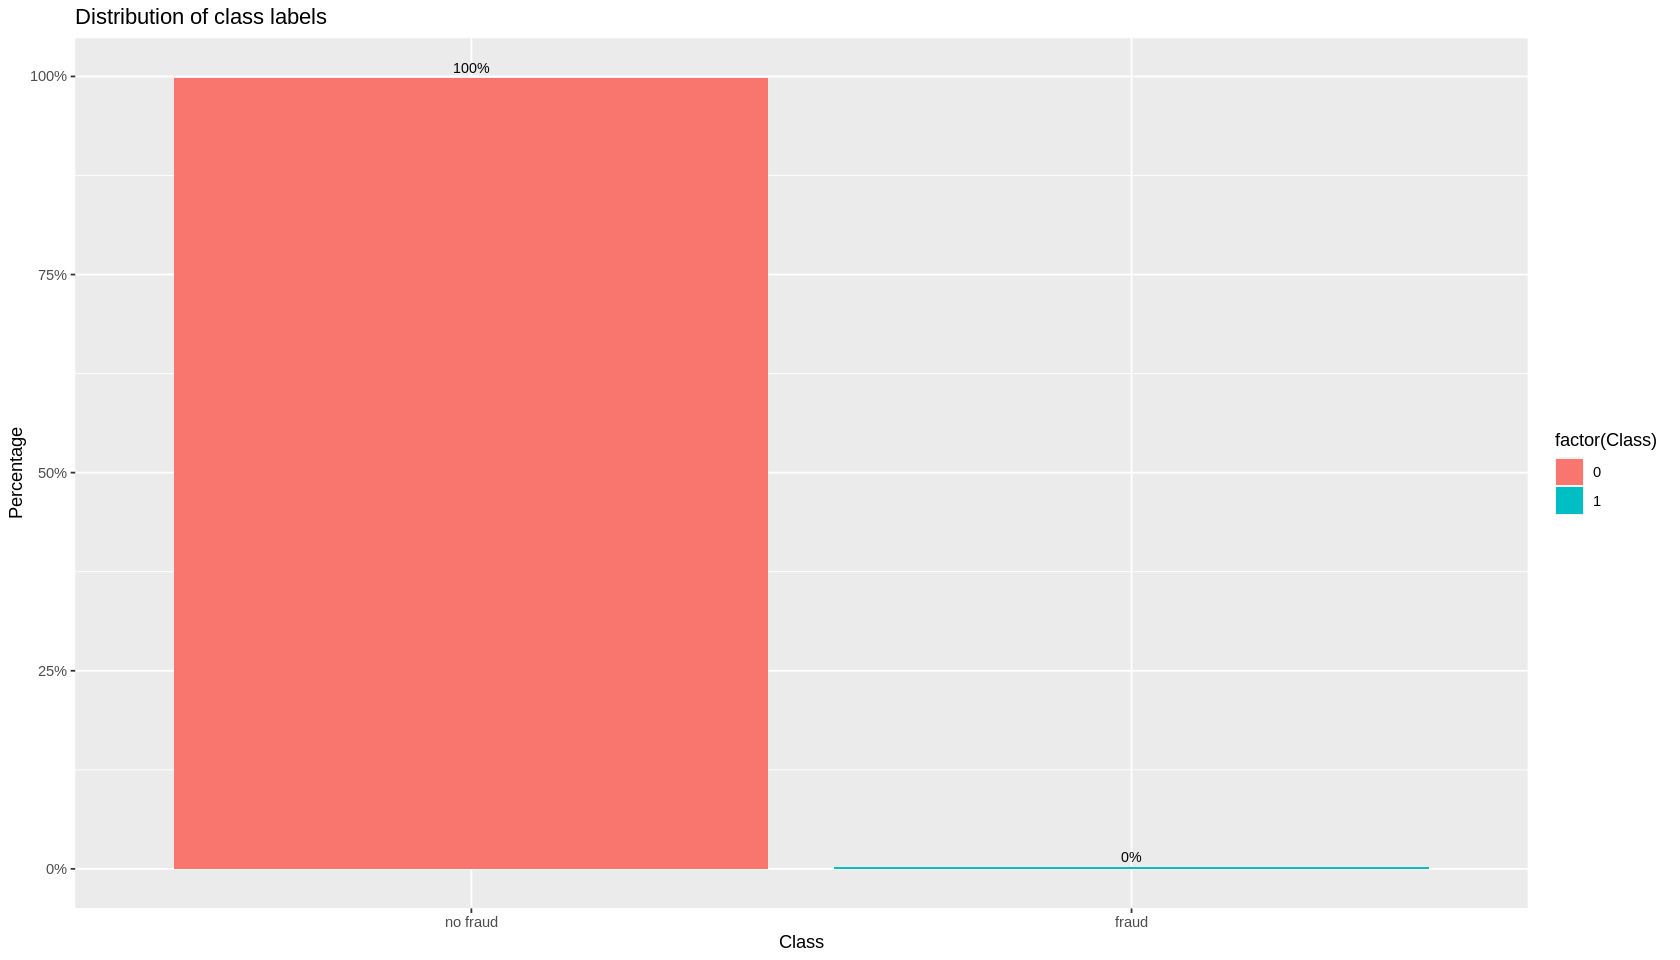

In [41]:
ggplot(data = dataset, aes(x = factor(Class),
                          y = prop.table(stat(count)), fill = factor(Class),
                          label = scales::percent(prop.table(stat(count))))) +
    geom_bar(position = "dodge") +
    geom_text(stat = 'count',
              position = position_dodge(.9),
              vjust = -0.5,
              size = 3) +
    scale_x_discrete(labels = c("no fraud", "fraud"))+
    scale_y_continuous(labels = scales::percent)+
    labs(x = 'Class', y = 'Percentage') +
    ggtitle("Distribution of class labels")

Class is very imbalanced

#### Data Visualization

In [15]:
colnames(dataset)

[1] "Time"   "V1"     "V2"     "V3"     "V4"     "V5"     "V6"     "V7"    
 [9] "V8"     "V9"     "V10"    "V11"    "V12"    "V13"    "V14"    "V15"   
[17] "V16"    "V17"    "V18"    "V19"    "V20"    "V21"    "V22"    "V23"   
[25] "V24"    "V25"    "V26"    "V27"    "V28"    "Amount" "Class"

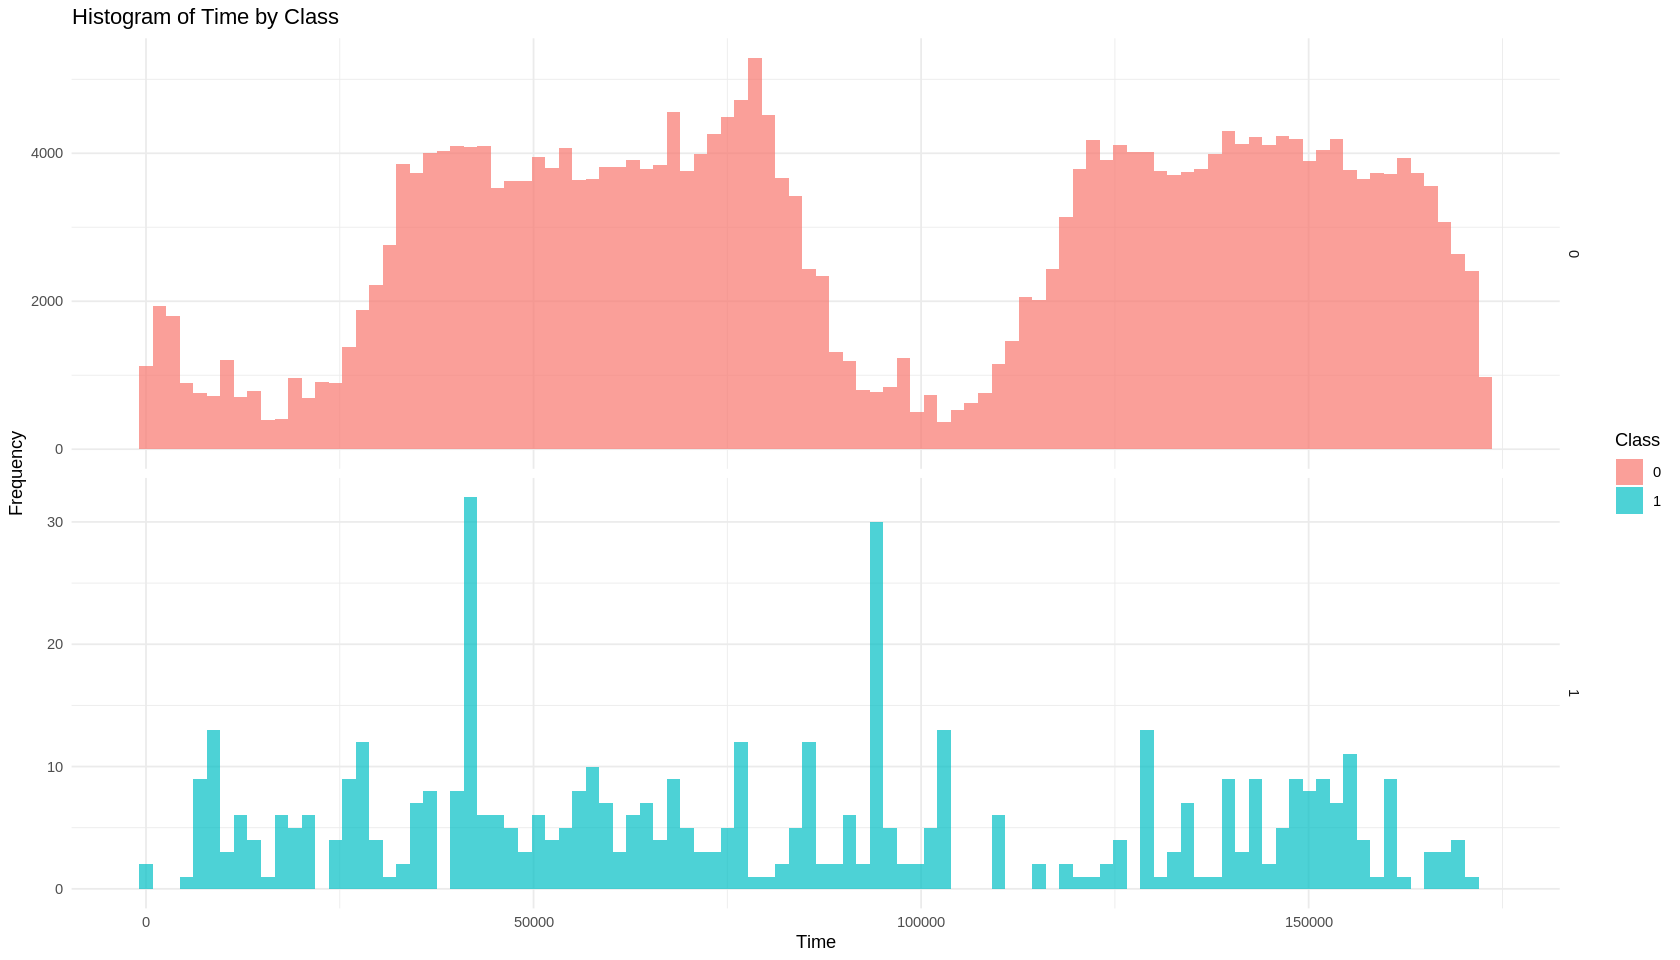

In [22]:
options(repr.plot.width=14, repr.plot.height=8)
ggplot(data=dataset, aes(x=Time, fill=factor(Class))) +
  geom_histogram(bins=100, position="identity", alpha=0.7) +
  facet_grid(Class ~ .,scale='free_y') +
  labs(title = "Histogram of Time by Class",
       x = "Time",
       y = "Frequency",
       fill = "Class") +
  theme_minimal()

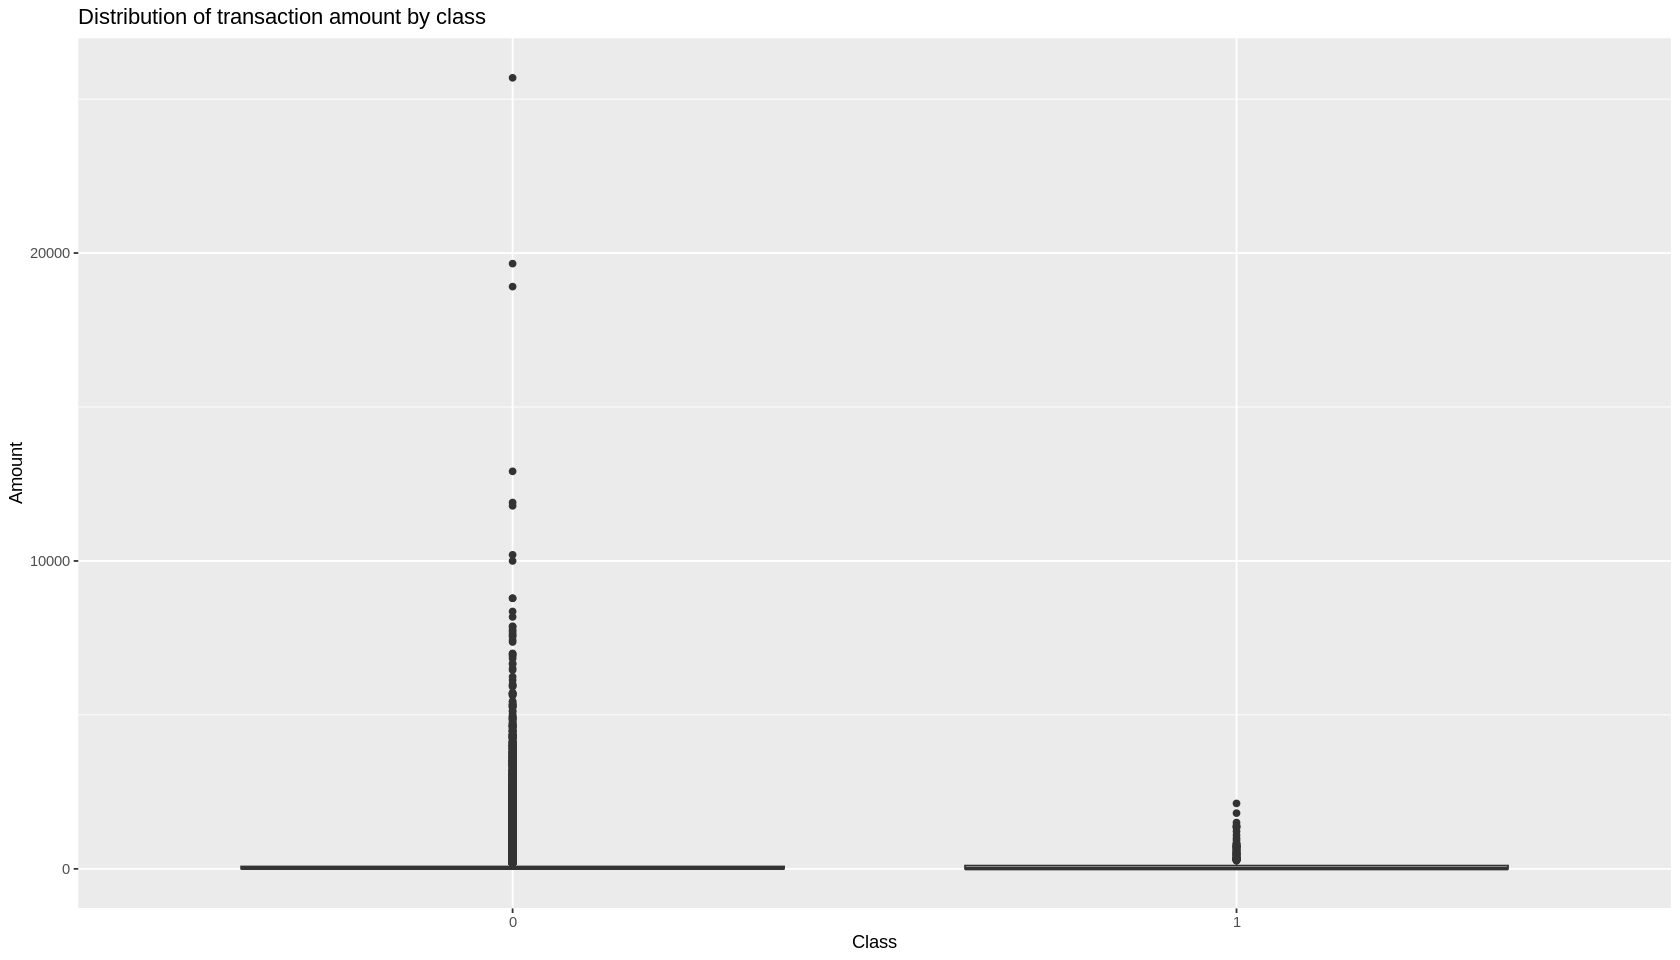

In [43]:
ggplot(data = dataset, aes(x = factor(Class), y = Amount)) + geom_boxplot() +
labs(x = 'Class', y = 'Amount') +
ggtitle("Distribution of transaction amount by class")

In [48]:
install.packages("corrplot")
install.packages("Rtsne")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’




In [49]:
library(corrplot)
library(Rtsne)

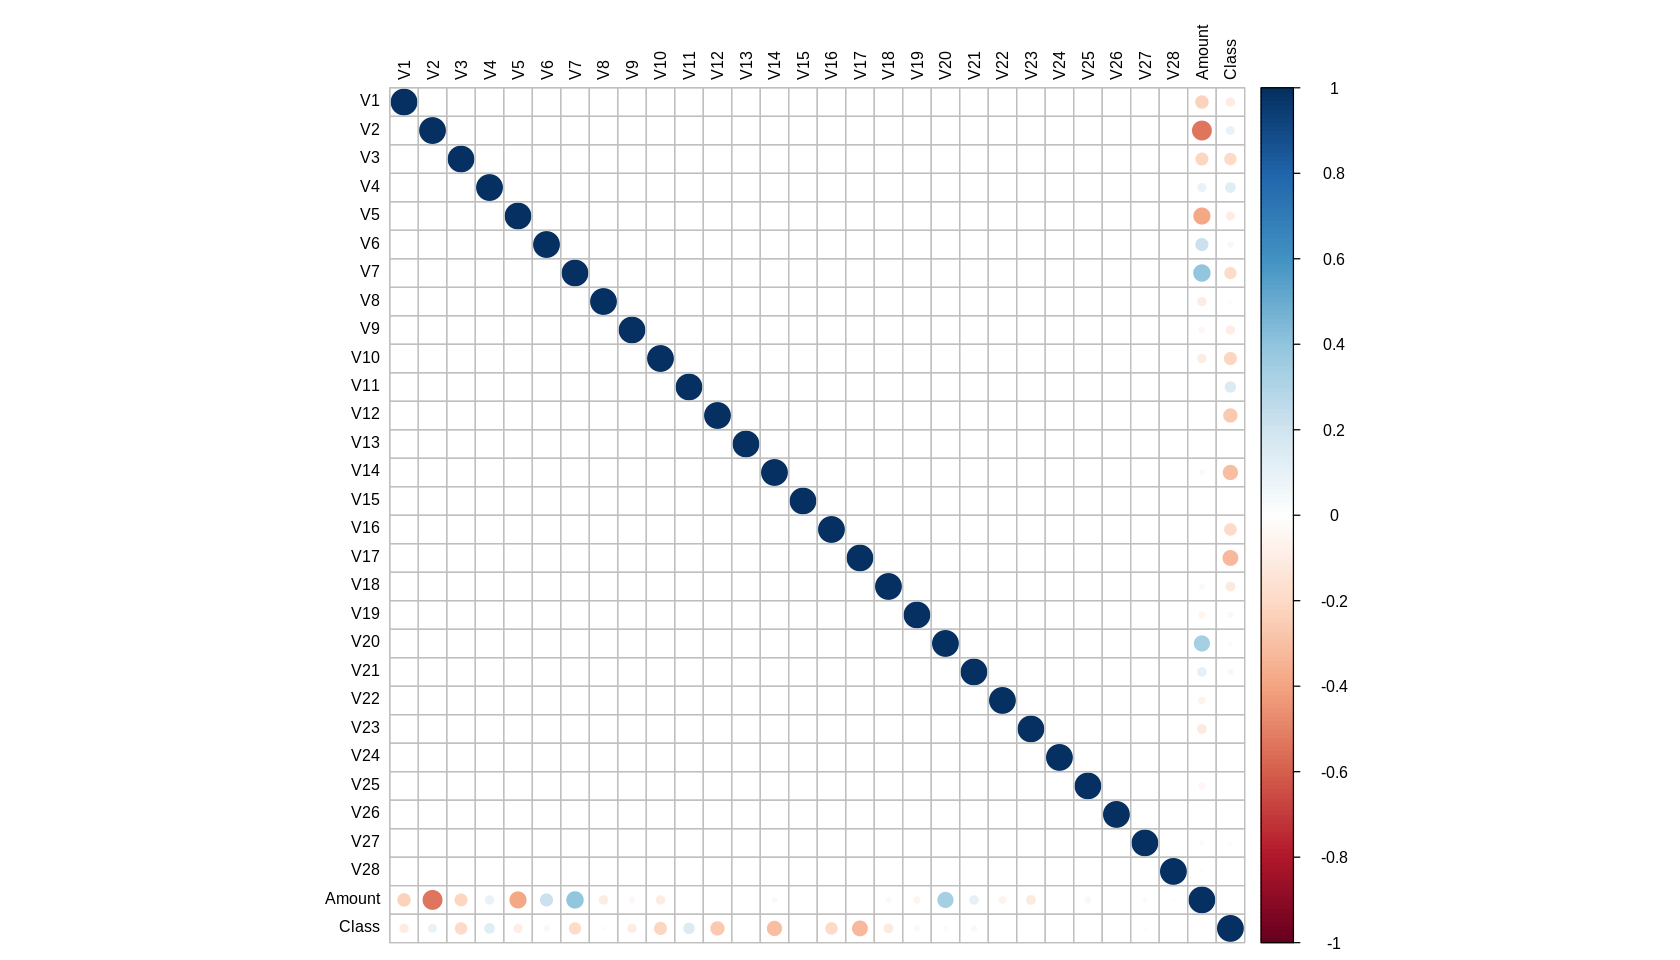

In [50]:
correlations <- cor(dataset[,-1],method="pearson")
corrplot(correlations, number.cex = .9, method = "circle", type = "full", tl.cex=0.8,tl.col = "black")

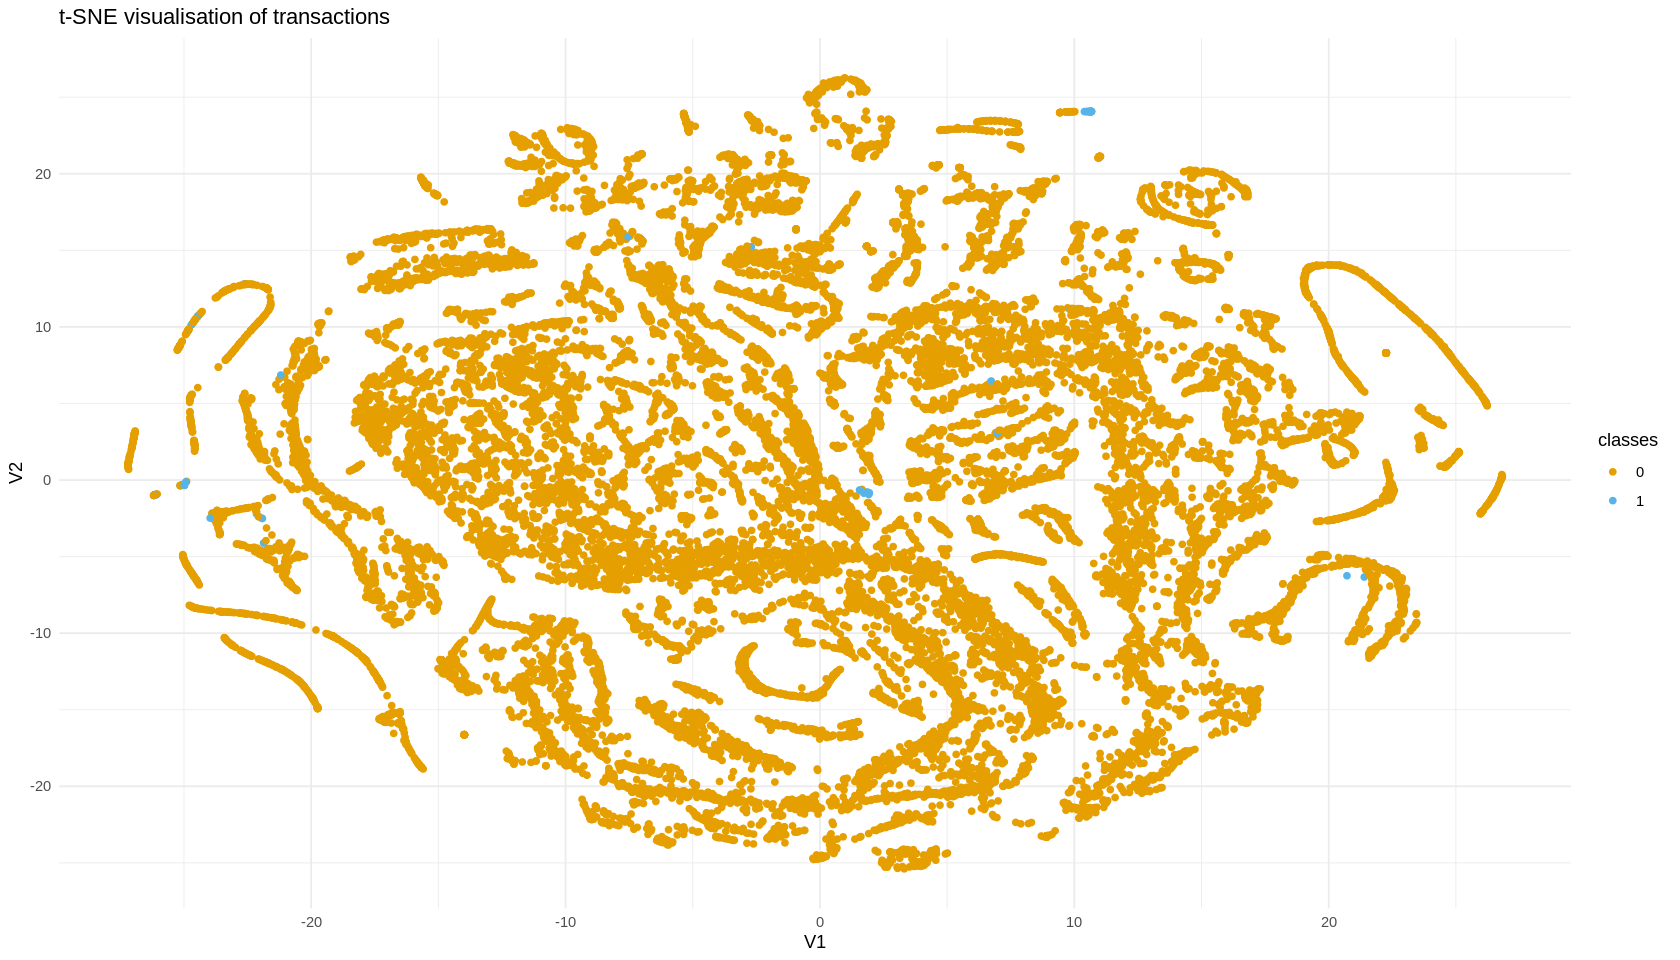

In [53]:
# Use 10% of data to compute t-SNE
tsne_subset <- 1:as.integer(0.1*nrow(dataset))
tsne <- Rtsne(dataset[tsne_subset,-c(1, 31)], perplexity = 20, theta = 0.5, pca = F, verbose = F, max_iter = 500, check_duplicates = F)

classes <- as.factor(dataset$Class[tsne_subset])
tsne_mat <- as.data.frame(tsne$Y)
ggplot(tsne_mat, aes(x = V1, y = V2)) + geom_point(aes(color = classes)) + theme_minimal() + ggtitle("t-SNE visualisation of transactions") +
  scale_color_manual(values = c("#E69F00", "#56B4E9"))

#### Data Perparation

In [54]:
dataset <- dataset[,-1]

In [56]:
#Change 'Class' variable to factor
dataset$Class <- as.factor(dataset$Class)
levels(dataset$Class) <- c("Not_Fraud", "Fraud")

#Scale numeric variables
dataset[,-30] <- scale(dataset[,-30])

head(dataset)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-0.6942411,-0.04407485,1.6727706,0.9733638,-0.245116153,0.34706734,0.1936786,0.08263713,0.3311272,0.08338540,⋯,-0.02492332,0.382853766,-0.17691102,0.1105067,0.2465850,-0.3921697,0.33089104,-0.06378104,0.24496383,Not_Fraud
2,0.6084953,0.16117564,0.1097969,0.3165224,0.043483276,-0.06181986,-0.0637001,0.07125336,-0.2324938,-0.15334936,⋯,-0.30737626,-0.880075209,0.16220090,-0.5611296,0.3206933,0.2610690,-0.02225564,0.04460744,-0.34247394,Not_Fraud
3,-0.6934992,-0.81157640,1.1694664,0.2682308,-0.364571146,1.35145121,0.6397745,0.20737237,-1.3786729,0.19069928,⋯,0.33763110,1.063356404,1.45631719,-1.1380901,-0.6285356,-0.2884462,-0.13713661,-0.18102051,1.16068389,Not_Fraud
4,-0.4933240,-0.11216923,1.1825144,-0.6097256,-0.007468867,0.93614819,0.1920703,0.31601704,-1.2625010,-0.05046786,⋯,-0.14744304,0.007266895,-0.30477601,-1.9410237,1.2419015,-0.4602165,0.15539593,0.18618826,0.14053401,Not_Fraud
5,-0.5913287,0.53154012,1.0214099,0.2846549,-0.295014918,0.07199846,0.4793014,-0.22650983,0.7443250,0.69162382,⋯,-0.01283920,1.100009340,-0.22012301,0.2332497,-0.3952009,1.0416095,0.54361884,0.65181477,-0.07340321,Not_Fraud
6,-0.2174742,0.58167387,0.7525841,-0.1188331,0.305008424,-0.02231344,0.3849353,0.21795429,-0.5176177,-0.34110050,⋯,-0.28352172,-0.771425648,-0.04227277,-0.6132723,-0.4465828,0.2196368,0.62889938,0.24563577,-0.33855582,Not_Fraud


In [60]:
install.packages("caTools")
library(caTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [61]:
set.seed(123)
split <- sample.split(dataset$Class, SplitRatio = 0.7)
train <-  subset(dataset, split == TRUE)
test <- subset(dataset, split == FALSE)

In [62]:
# class ratio initially
table(train$Class)


Not_Fraud     Fraud 
   199020       344 

In [68]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [77]:
library(caret)

In [71]:
library(rpart)

[1] "AUC: 0.911933979527332"


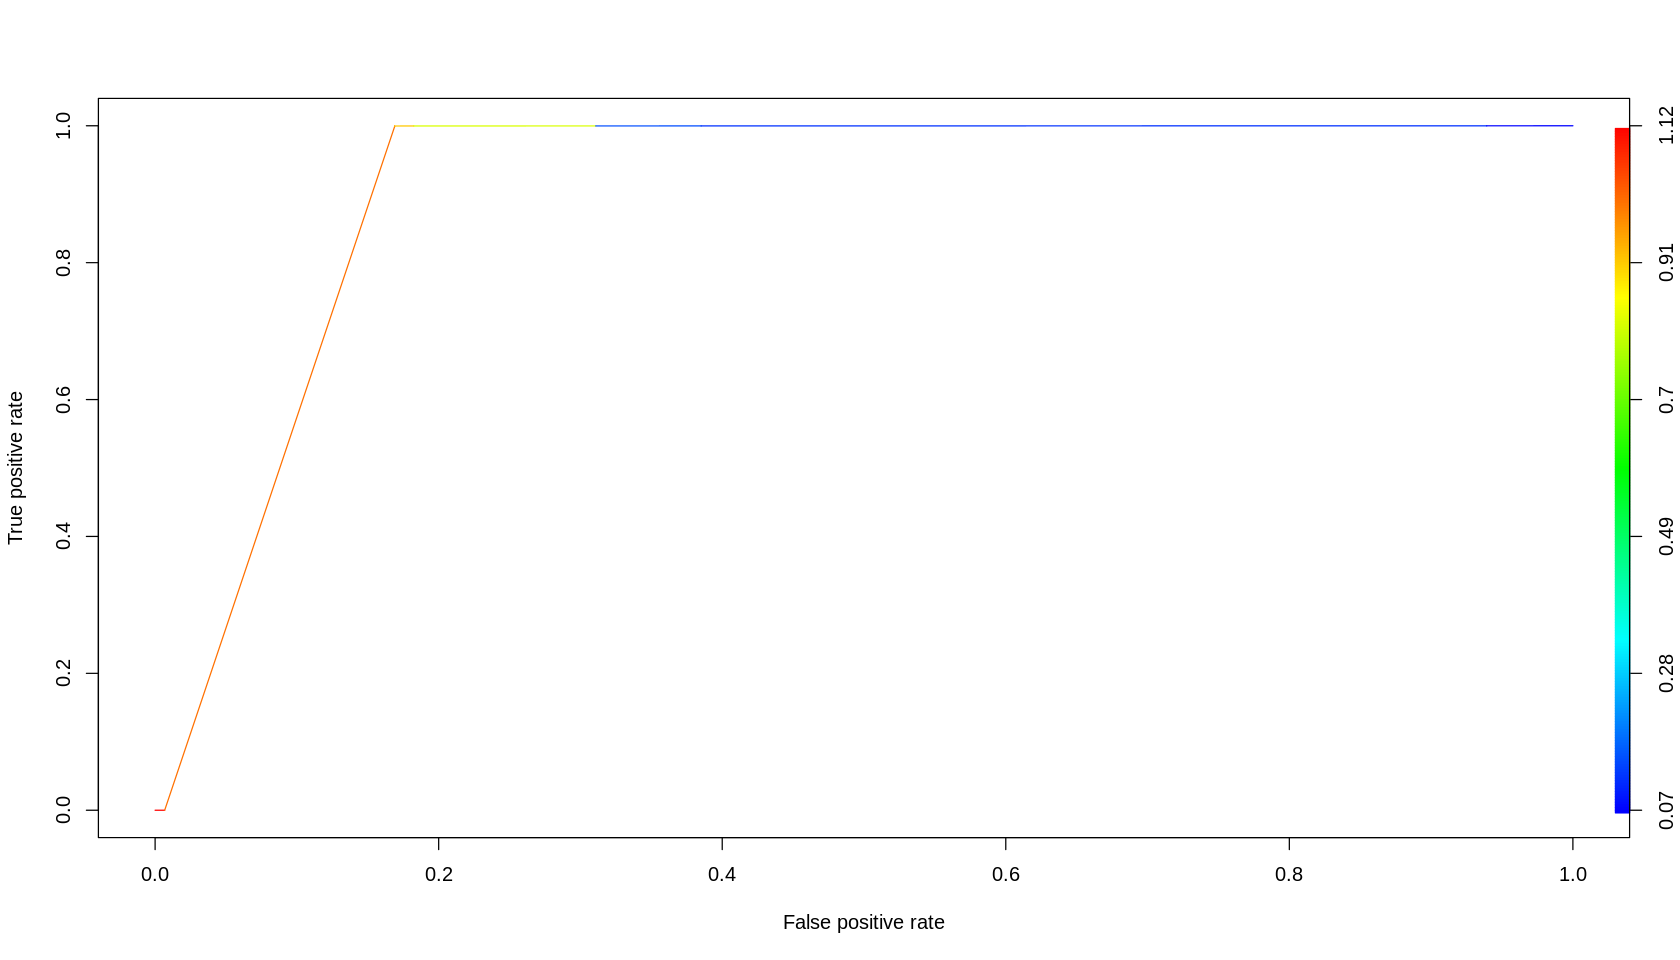

In [89]:
#CART Model Performance on imbalanced data
orig_fit <- rpart(Class ~ ., data = train)
pred_up <- predict(orig_fit, newdata = test, type = "prob")
pred <- prediction(pred_up[, 1], test$Class)

perf <- performance(pred, "tpr", "fpr")

# Optionally plot ROC curve
plot(perf, colorize = TRUE)

# Compute AUC
auc <- performance(pred, "auc")@y.values[[1]]
print(paste("AUC:", auc))

In [70]:
# upsampling
up_train <- upSample(x = train[, -ncol(train)], y = train$Class)
table(up_train$Class)


Not_Fraud     Fraud 
   199020    199020 

In [72]:
# Build up-sampled model
up_fit <- rpart(Class ~ ., data = up_train)

In [75]:
install.packages("ROCR")
library(ROCR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gplots’




#### AUC

[1] "AUC: 0.943337273025414"


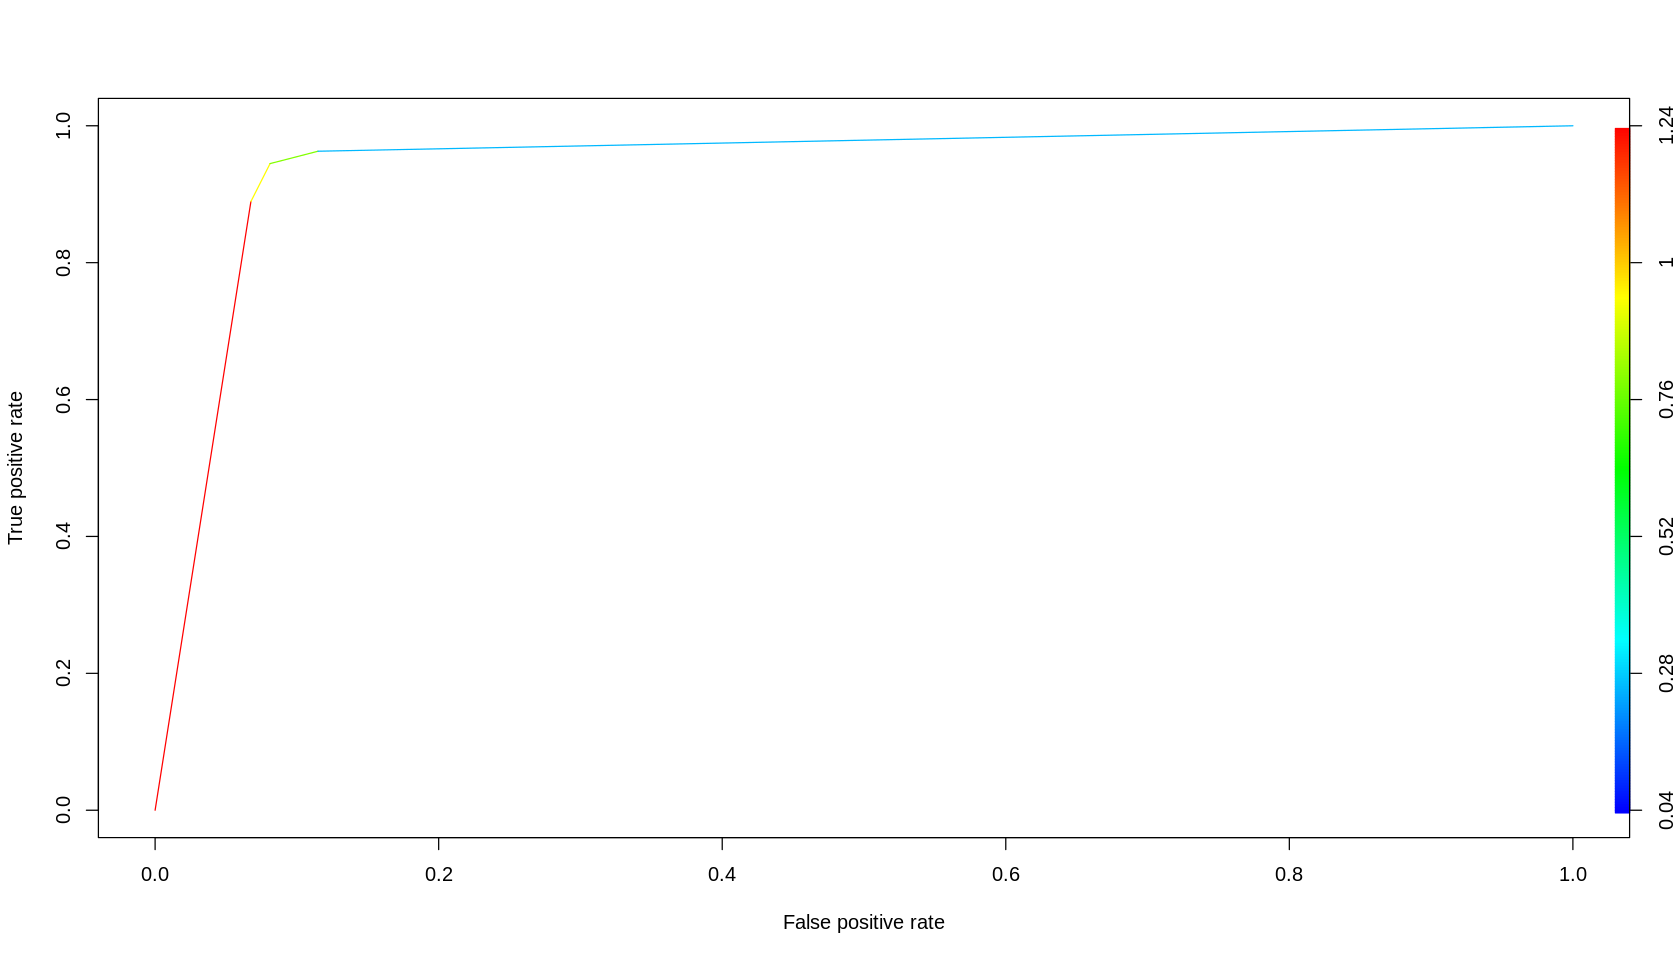

In [84]:
# AUC on up-sampled data
pred_up <- predict(up_fit, newdata = test, type = "prob")
pred <- prediction(pred_up[, 1], test$Class)

perf <- performance(pred, "tpr", "fpr")

# Optionally plot ROC curve
plot(perf, colorize = TRUE)

# Compute AUC
auc <- performance(pred, "auc")@y.values[[1]]
print(paste("AUC:", auc))

#### XGBOOST

In [87]:
install.packages("xgboost")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [93]:
library(xgboost)

In [90]:
# Convert class labels from factor to numeric
labels <- up_train$Class
y <- recode(labels, 'Not_Fraud' = 0, "Fraud" = 1)

In [103]:
xgb <- xgboost(data = data.matrix(up_train[,-30]),
 label = y,
 eta = 0.1,
 gamma = 0.1,
 max_depth = 6,
 nrounds = 100,
 objective = "binary:logistic",
 colsample_bytree = 0.6,
 verbose = 1,
 nthread = 7,
)

[1]	train-logloss:0.607640 
[2]	train-logloss:0.538462 
[3]	train-logloss:0.479593 
[4]	train-logloss:0.427421 
[5]	train-logloss:0.384593 
[6]	train-logloss:0.347889 
[7]	train-logloss:0.312212 
[8]	train-logloss:0.283937 
[9]	train-logloss:0.256078 
[10]	train-logloss:0.232234 
[11]	train-logloss:0.212779 
[12]	train-logloss:0.193464 
[13]	train-logloss:0.176293 
[14]	train-logloss:0.162839 
[15]	train-logloss:0.148380 
[16]	train-logloss:0.134940 
[17]	train-logloss:0.122779 
[18]	train-logloss:0.112344 
[19]	train-logloss:0.102599 
[20]	train-logloss:0.093692 
[21]	train-logloss:0.086025 
[22]	train-logloss:0.078619 
[23]	train-logloss:0.072598 
[24]	train-logloss:0.067646 
[25]	train-logloss:0.062209 
[26]	train-logloss:0.057885 
[27]	train-logloss:0.053454 
[28]	train-logloss:0.049702 
[29]	train-logloss:0.046276 
[30]	train-logloss:0.042851 
[31]	train-logloss:0.039707 
[32]	train-logloss:0.036892 
[33]	train-logloss:0.034251 
[34]	train-logloss:0.032069 
[35]	train-logloss:0.03

In [104]:
library(pROC)

 num [1:85443] 6.44e-04 4.55e-05 3.83e-04 1.64e-04 1.73e-04 ...


Setting levels: control = Not_Fraud, case = Fraud

Setting direction: controls < cases



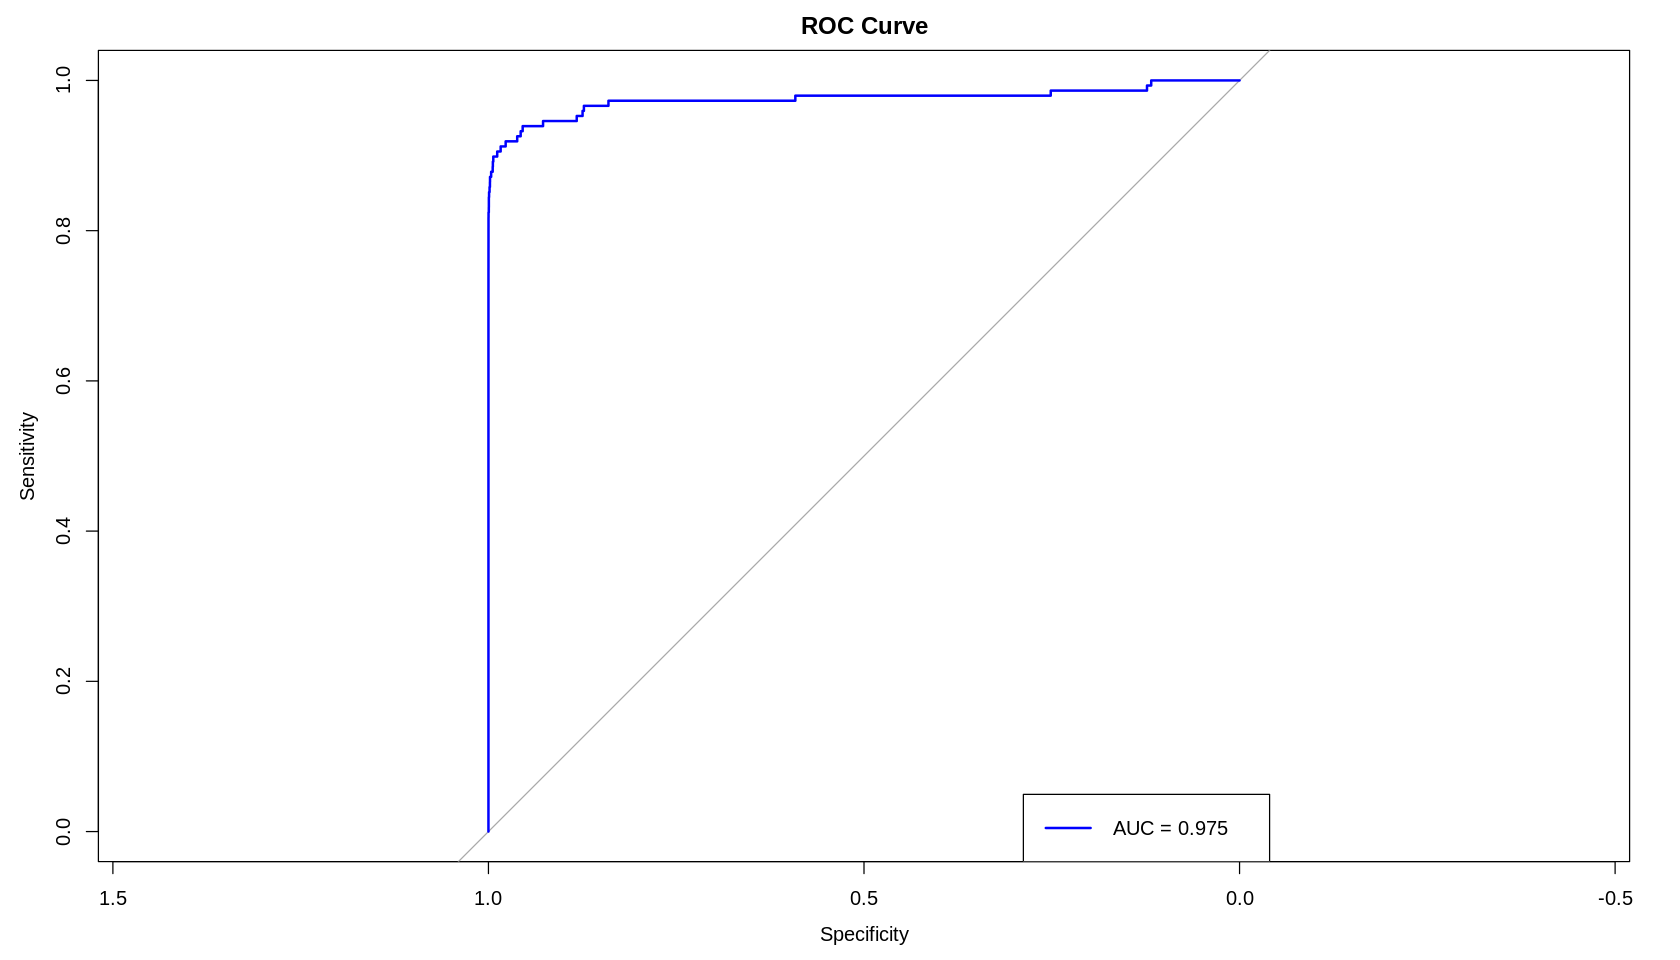

In [105]:
pred_probs <- predict(xgb, data.matrix(test[, -30]))

str(pred_probs)
# Create ROC curve object
roc_obj <- roc(test$Class, pred_probs)

# Plot ROC curve
plot(roc_obj, main = "ROC Curve", col = "blue", lwd = 2)

# Add legend
legend("bottomright", legend = paste("AUC =", round(auc(roc_obj), 3)), col = "blue", lwd = 2)

##### Most important features

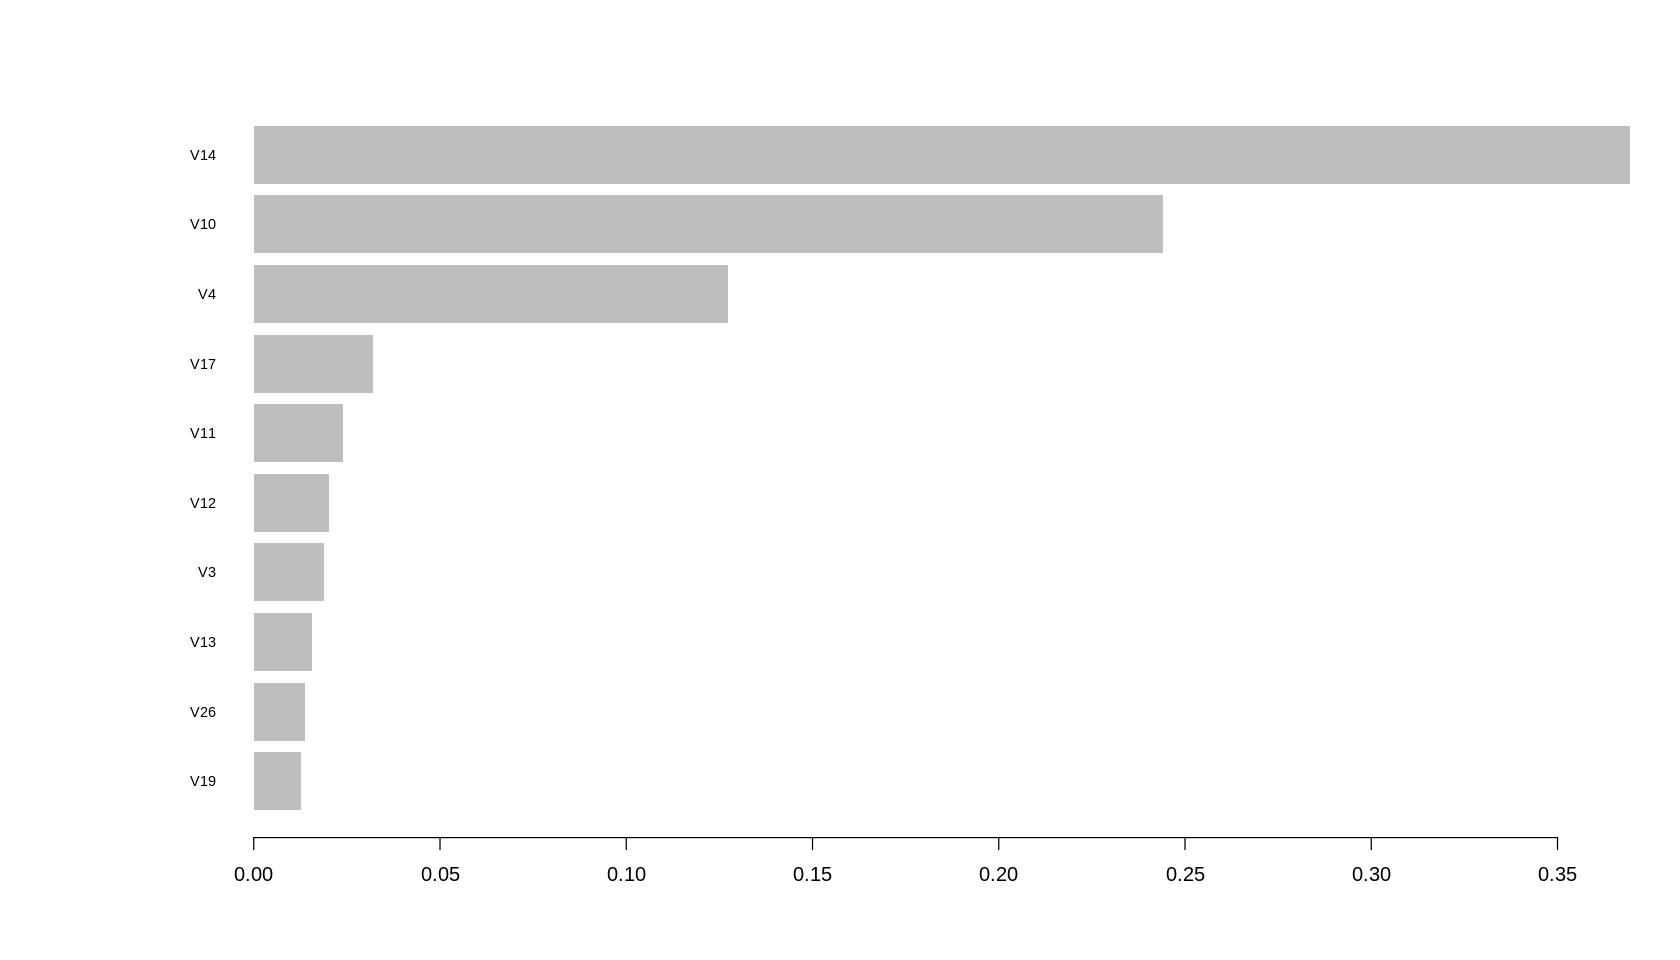

In [106]:
names <- dimnames(data.matrix(up_train[,-30]))[[2]]

# Compute feature importance matrix
importance_matrix <- xgb.importance(names, model = xgb)

xgb.plot.importance(importance_matrix[1:10,])